# QC a FEMTIC inversion 

Example with the AusLAMP South Australia Dataset

In [1]:
import sys
sys.path.append('../../src')
import femticPy

# 1. Set up a data object (same as when created for the inversion)

In [2]:
inversion = femticPy.DataGen(survey = 'auslamp', outdir = './inversion')

# Loading the data and the data coordinates
inversion.read_MTdata('./input_data/edi_files/')
inversion.read_MTdata_coordinates('./input_data', 'coord_auslampSA')

## Data to be inverted for
inversion.invert_Z   = True
inversion.invert_VTF = False
inversion.invert_PT  = False

# load the 3 files needed to create the mesh
inversion.topography = './input_data/topography.dat'
inversion.bathymetry = './input_data/bathymetry.dat'
inversion.coast_line = './input_data/coast_line.dat'

# we center the data to a anchor point (center of the data set) which will also be the center of the future mesh
inversion.center_data()
inversion.anchor


    reading EP001.edi
    reading EP002.edi
    reading EP003.edi
    reading EP004.edi
    reading EP005.edi
    reading EP006.edi
    reading EP007.edi
    reading EP008.edi
    reading EP009.edi
    reading FR03.edi
    reading FR04.edi
    reading FR05.edi
    reading FR06.edi
    reading FR07.edi
    reading FR08.edi
    reading FR09.edi
    reading FR10.edi
    reading FR11.edi
    reading FR12.edi
    reading FR13.edi
    reading FR14.edi
    reading FR15.edi
    reading FR16.edi
    reading FR17.edi
    reading FR18.edi
    reading FR19.edi
    reading FR20.edi
    reading FR21.edi
    reading FR22.edi
    reading FR23.edi
    reading FR24.edi
    reading FR25.edi
    reading FR27.edi
    reading FR28.edi
    reading FR29.edi
    reading NF22.edi
    reading NF23.edi
    reading NF24.edi
    reading NF27.edi
    reading NF28.edi
    reading NF38.edi
    reading NF41.edi
    reading NF42.edi
    reading NF43.edi
    reading NF44.edi
    reading SA001.edi
    reading SA002.edi
  

[6190.4220000000005, 715.3695]

# 2. Analyse and plot inversion results

In [12]:
results_directory = './inversion/inv01'

results = femticPy.InvResults(inversion.survey,
                              inversion.mt_coords, 
                              inversion.ids_Z,
                              inversion.ids_VTF,
                              results_directory)


In [13]:
# Set the number of the last iteration
results.nIter = 13
results.read_result_csv()

# print total RMS 
results.compute_rms_breakDown()
print('RMS TOTAL: ',results.rms_total)
print('RMS Z: ',results.rms_Z)
print('RMS VTF: ',results.rms_VTF)

RMS TOTAL:  1.2947873062008093
RMS Z:  1.2947873062008093
RMS VTF:  None


/Users/sei029/Documents/projects/strategic_FEMTIC/repo_github/femticPy/projects/auslamp/../../src/femticPy.py:1055: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'EP001' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  resp_Z_all['StaID'][idx[0]] = self.ids_Z[site]


In [5]:
# print RMS per site / per component
results.rms_breakDown_Z.style.background_gradient()

,StaID,Total,Zxx,Zxy,Zyx,Zyy
0,EP001,1.905840,1.001830,3.290851,0.989734,1.309952
1,EP002,3.179841,1.436396,3.175939,4.669997,2.546931
2,EP003,1.094150,0.935312,0.717701,1.370646,1.232916
3,EP004,1.016337,0.641629,0.906865,1.188960,1.218212
4,EP005,1.166017,0.693648,1.232116,1.293591,1.328815
5,EP006,1.403290,0.988851,1.121203,1.148349,2.079245
6,EP007,0.934006,1.114781,0.666580,0.852026,1.037522
7,EP008,1.286182,0.902231,1.493356,1.313070,1.359693
8,EP009,1.247636,1.106810,1.841551,0.790236,0.992758
9,FR03,1.005414,0.365735,0.839004,0.983484,1.496161


In [6]:
#results.rms_breakDown_VTF.style.background_gradient()

Plotting nRMSE map for the impedance Z...


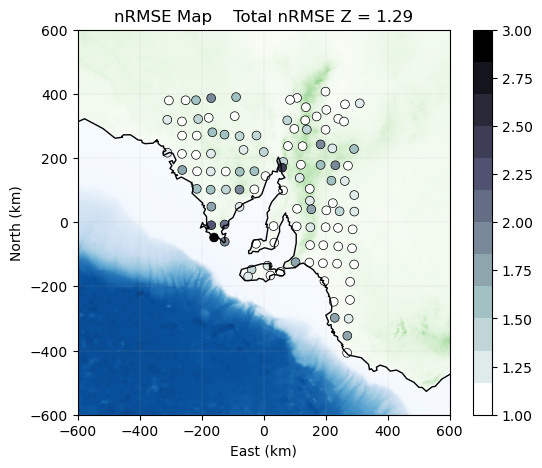

In [7]:
# plot RMS map

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,1,sharex=True, sharey=True,figsize=(6,5))

inversion.plot_coast_line()
inversion.plot_topo_bathy()
results.plot_rms_map(ax = axs,
                     Z = True,
                     VTF = False,
                     xlim = [-600, 600],
                     ylim = [-600, 600], 
                     vmin=1, vmax=3,
                     save_plot=False)

#frequencies = results.resp_VTF['Freq[Hz]'][[2,3,4]].values
results.plot_induction_arrows(frequencies,
                              # real = True,
                              # imag = False,
                              inv_response = True,
                              scale = 0.3,
                              xlim = [-18, 18],
                              ylim = [-18, 18], 
                              save_plot = True)


In [10]:
results.plot_Z_fit(plot_Z = False,
                 xlim = [0,5],
                 ylim = [-6,1],
                 save_plot = True,
                 add_map_stats = True)

Plotting inversion responses ...
   ...MT site  EP001
   ...MT site  EP002
   ...MT site  EP003
   ...MT site  EP004
   ...MT site  EP005
   ...MT site  EP006
   ...MT site  EP007
   ...MT site  EP008
   ...MT site  EP009
   ...MT site  FR03
   ...MT site  FR04
   ...MT site  FR05
   ...MT site  FR06
   ...MT site  FR07
   ...MT site  FR08
   ...MT site  FR09
   ...MT site  FR10
   ...MT site  FR11
   ...MT site  FR12
   ...MT site  FR13
   ...MT site  FR14
   ...MT site  FR15
   ...MT site  FR16
   ...MT site  FR17
   ...MT site  FR18
   ...MT site  FR19
   ...MT site  FR20
   ...MT site  FR21
   ...MT site  FR22
   ...MT site  FR23
   ...MT site  FR24
   ...MT site  FR25
   ...MT site  FR27
   ...MT site  FR28
   ...MT site  FR29
   ...MT site  NF22
   ...MT site  NF23
   ...MT site  NF24
   ...MT site  NF27
   ...MT site  NF28
   ...MT site  NF38
   ...MT site  NF41
   ...MT site  NF42
   ...MT site  NF43
   ...MT site  NF44
   ...MT site  SA001
   ...MT site  SA002
   ...MT site  S

results.plot_VTF_fit(xlim = [-1,5],
                    ylim = [-0.5,0.5],
                     save_plot = True,
                     add_map_stats = True)

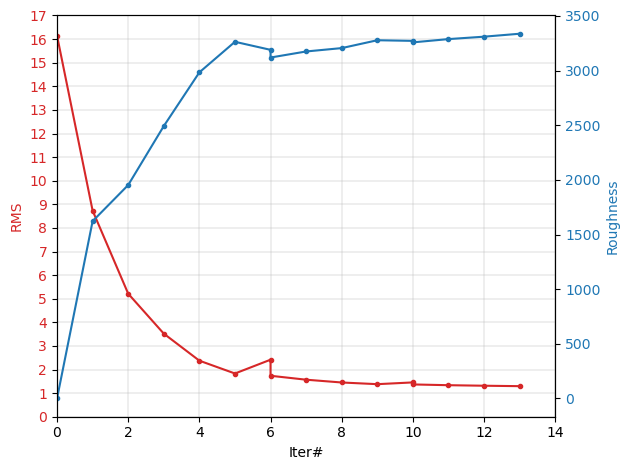

In [9]:
results.plot_cnv(save_plot=False)